In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file1 = "data/mouse_drug_data.csv"
file2 = "data/clinicaltrial_data.csv"
mousedata = pd.read_csv(file1)
clinicaldata = pd.read_csv(file2)
mousedata.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinicaldata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
merged_data = pd.merge(clinicaldata,mousedata, on = "Mouse ID")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
#merged_data["Drug"].unique()

In [20]:
#Tumor Response to Treatment (t.vol./time pt.)
tumor_resp_reord = merged_data.reset_index().groupby(["Timepoint","Drug"])["Tumor Volume (mm3)"].aggregate("mean").unstack()
tumor_resp_reord.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [23]:
tumor_resp_reord = tumor_resp_reord[["Capomulin","Infubinol","Ketapril","Placebo"]]
tumor_resp_reord.head(10)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


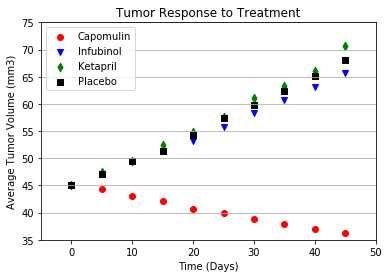

In [52]:
timept = tumor_resp_reord.index
t_vol_capo = tumor_resp_reord["Capomulin"]
t_vol_infu = tumor_resp_reord["Infubinol"]
t_vol_keta = tumor_resp_reord["Ketapril"]
t_vol_plac = tumor_resp_reord["Placebo"]
plt.scatter(timept,t_vol_capo, marker="o", facecolors="red", edgecolors="red", label="Capomulin", linewidth= 1)
plt.scatter(timept,t_vol_infu, marker="v", facecolors="blue", edgecolors="blue", label="Infubinol", linewidth= 1)
plt.scatter(timept,t_vol_keta, marker="d", facecolors="green", edgecolors="green", label="Ketapril", linewidth= 1)
plt.scatter(timept,t_vol_plac, marker="s", facecolors="black", edgecolors="black",label="Placebo", linewidth= 1)
plt.ylim(35,75)
plt.xlim(-5,50)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(b=None, which="major", axis="y")
plt.show()
#line, error bars(standard error)

In [74]:
#Metastatic Response to Treatment
meta_reord = merged_data.reset_index().groupby(["Timepoint","Drug"])["Metastatic Sites"].aggregate("mean").unstack()
meta_reord = meta_reord[["Capomulin","Infubinol","Ketapril","Placebo"]]
meta_reord.head(10)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


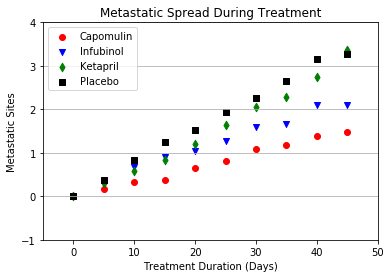

In [76]:
timept_m = meta_reord.index
meta_capo = meta_reord["Capomulin"]
meta_infu = meta_reord["Infubinol"]
meta_keta = meta_reord["Ketapril"]
meta_plac = meta_reord["Placebo"]
plt.scatter(timept_m,meta_capo, marker="o", facecolors="red", edgecolors="red", label="Capomulin", linewidth= 1)
plt.scatter(timept_m,meta_infu, marker="v", facecolors="blue", edgecolors="blue", label="Infubinol", linewidth= 1)
plt.scatter(timept_m,meta_keta, marker="d", facecolors="green", edgecolors="green", label="Ketapril", linewidth= 1)
plt.scatter(timept_m,meta_plac, marker="s", facecolors="black", edgecolors="black",label="Placebo", linewidth= 1)
plt.ylim(-1,4)
plt.xlim(-5,50)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")
plt.grid(b=None, which="major", axis="y")
plt.show()
#line, error bars(standard error)

In [85]:
surv_count = merged_data[["Timepoint","Drug","Mouse ID"]]
surv_count.groupby(["Drug","Timepoint"])
surv_count.head()

,Timepoint,Drug,Mouse ID
0,0,Capomulin,b128
1,5,Capomulin,b128
2,10,Capomulin,b128
3,15,Capomulin,b128
4,20,Capomulin,b128


In [ ]:
#3.scatter plot alive mice over time (survival rate)

In [ ]:
#4. bar graph total% tumor volume over 45 days each drug

In [ ]:
#5. 3 observations

In [ ]:
#capo_data = merged_data.loc[merged_data["Drug"] == "Capomulin", :]
#infu_data = merged_data.loc[merged_data["Drug"] == "Infubinol", :]
#keta_data = merged_data.loc[merged_data["Drug"] == "Ketapril", :]
#plac_data = merged_data.loc[merged_data["Drug"] == "Placebo", :]
#plac_data.head()

In [ ]:
#y = tumor vol, x = time points
#time_pts_cp = capo_data["Timepoint"]
#tumor_vol_cp = capo_data["Tumor Volume (mm3)"]
#plt.scatter(time_pts_cp, tumor_vol_cp, marker="o", facecolors="red", edgecolors="red")

In [ ]:
#drugs_df = merged_data.groupby("Drug", "Mouse ID")
#drugs_df.head()

In [ ]:
# drugs = [Capomulin, Infubinol, Ketapril, Placebo]
# tumor_vol = []
# time = []
# for drug in drugs:
#tumor_resp = merged_data.groupby(["Drug","Timepoint"])
#tumor_resp_cl = tumor_resp["Drug","Timepoint", "Tumor Volume (mm3)"]
#tumor_resp_cl.head()
#meta_sites = merged_data[["Drug","Timepoint","Metastatic Sites"]]
#meta_sites_ro = meta_sites.groupby(["Drug","Timepoint"])["Metastatic Sites"].aggregate("mean")
#meta_sites_ro.head()
#how to keep a dataframe?